# Christian Hansen

# Goal
Optimizing marketing campaigns is one of the most common data science tasks. Among the many possible marketing tools, one of the most efficient is usin  emails.
 mails are great cause they are free and can be easily personalized. Email optimization involves personalizing the text and/or the subject, who should receive it, when should be sent, etc. Machine Learning excels at this.


# Challenge Description
The marketing team of an e-commerce site has launched an email campaign. This site has email addresses from all the users who created an account in the past.
They have chosen a random sample of users and emailed them. The email let the user know about a new feature implemented on the site. From the marketing team perspective, a success is if the user clicks on the link inside of the email. This link takes the user to the company site.

You are in charge of figuring out how the email campaign performed and were asked the following questions:

- What percentage of users opened the email and what percentage clicked on the link within the email?
- The VP of marketing thinks that it is stupid to send emails to a random subset and in a random way. Based on all the information you have about the emails that were sent, can you build a model to optimize in future email campaigns to maximize the probability of users clicking on the link inside the email?
- By how much do you think your model would improve click through rate ( defined as # of users who click on the link / total users who received the email). How would you test that?
- Did you find any interesting pattern on how the email campaign performed for different segments of users? Explain.


### Using the three tables I'll solve for the challenge prompts and work through exploratory analysis and modeling to undertandstand how users are reacting to the email campaign

# Question 1: what percentage of users opened the email and what percentage clicked the link through the email?

In [1]:
ls email

email_opened_table.csv  email_table.csv         link_clicked_table.csv


In [2]:
## Lets start by importing modules that will help us out
import pandas as pd
import seaborn as sns
sns.set(style="ticks")
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
# load tables from csv to dataframe objects
email_opened=pd.read_csv('./email/email_opened_table.csv')
link_clicked=pd.read_csv('./email/link_clicked_table.csv')
email_table=pd.read_csv('./email/email_table.csv')

In [4]:
# explore the tables
email_opened.head()

,email_id
0,284534
1,609056
2,220820
3,905936
4,164034


In [5]:
email_table.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


In [6]:
link_clicked.head()

,email_id
0,609056
1,870980
2,935124
3,158501
4,177561


Exploring the structure we see that email opened and clicked tables represent subsets of email_id's that show whether the users clicked or opened the email from the main email_table. To find the percentage we just have to look at the ratio of the lengths of the subset tables and the main email_table.

In [7]:
link_clicked.shape

(2119, 1)

In [8]:
email_opened.shape

(10345, 1)

In [9]:
email_table.shape

(100000, 7)

## Proportion of users who clicked the link to get to the website

In [10]:
link_clicked.shape[0]*1.0 / email_table.shape[0] *100

2.119

# Proportion of users who opened the email

In [11]:
email_opened.shape[0]*1.0 / email_table.shape[0] *100

10.345

It looks like only about 2% clicked the link through the email and 10% opened the email.

## Looking at the percentage of users who, when opening the email, clicked the link

In [12]:
sum(link_clicked['email_id'].isin(email_opened['email_id']))*1.0 / email_opened.shape[0] *100

20.0

## This then shows that only 20% of those who opened the email click the link to get to the website

# Question 2: Build a predictive model to optimize the future email campaigns to maximize the probability of users clicking on the link inside the email

## Prework: Exploratory Analysis

In [13]:
# Check that all email_ids are unique
len(email_table['email_id'].unique())*1.0 /email_table.shape[0]*100

100.0

In [14]:
email_table.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


### Count frequencies or distributions of each field

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


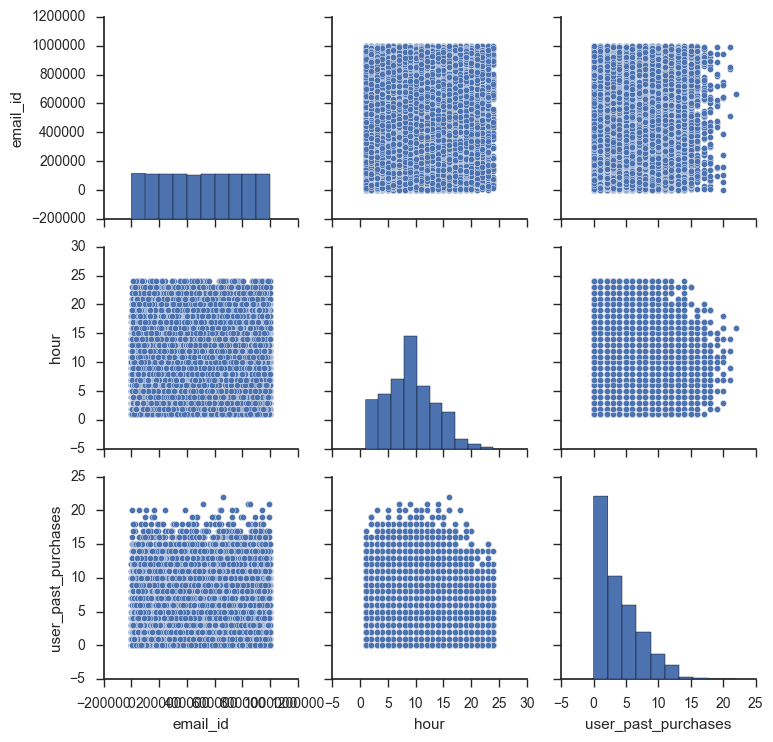

In [15]:
sns.pairplot(email_table)

In [16]:
email_table.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


In [17]:
columns = [i for i in email_table.columns if i!='email_id']

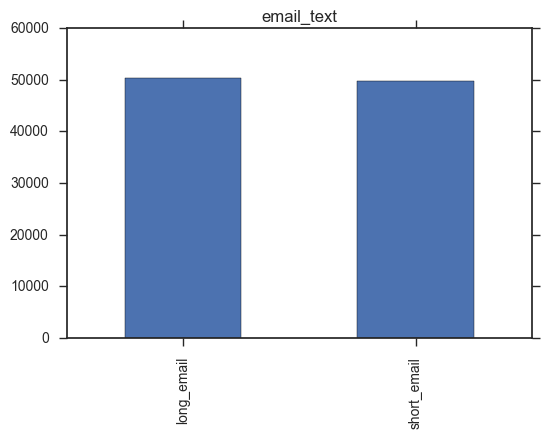

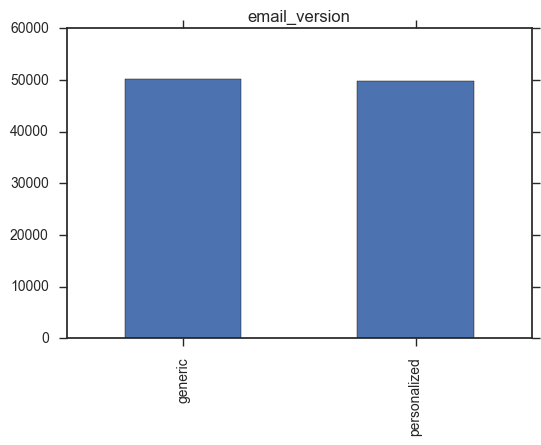

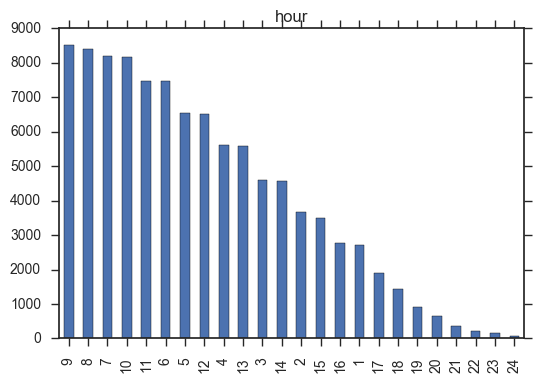

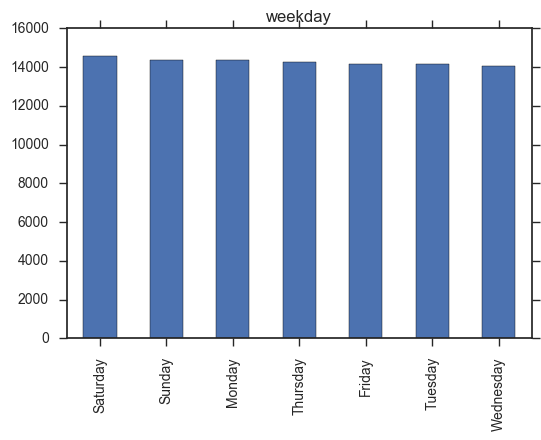

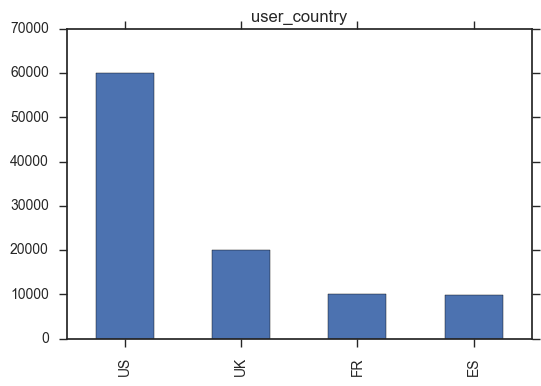

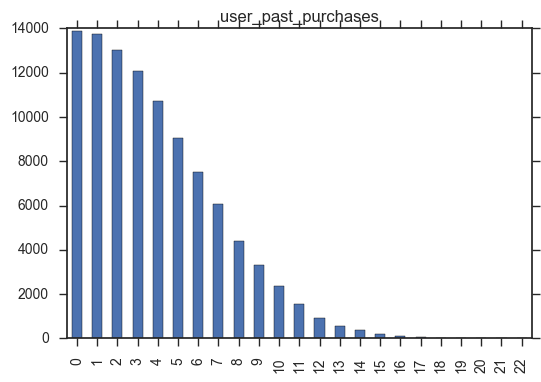

In [18]:
for col in columns:
    email_table[col].value_counts().plot(kind='bar',title=col)
    plt.show()

So it looks like most people are first time purchasers in the united states, who mainly purchase at 9 am. The weekday and the type of email does not seem to be significant.

In [19]:
email_table.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


In [20]:
email_table.drop('class',axis=1,inplace=True)

ValueError: labels ['class'] not contained in axis

In [21]:
email_table.loc[email_table['email_id'].isin(link_clicked['email_id'])==True,'class']=1

In [22]:
email_table.loc[email_table['email_id'].isin(link_clicked['email_id'])==False,'class']=0

In [23]:
email_table.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,class
0,85120,short_email,personalized,2,Sunday,US,5,0.0
1,966622,long_email,personalized,12,Sunday,UK,2,1.0
2,777221,long_email,personalized,11,Wednesday,US,2,0.0
3,493711,short_email,generic,6,Monday,UK,1,0.0
4,106887,long_email,generic,14,Monday,US,6,0.0


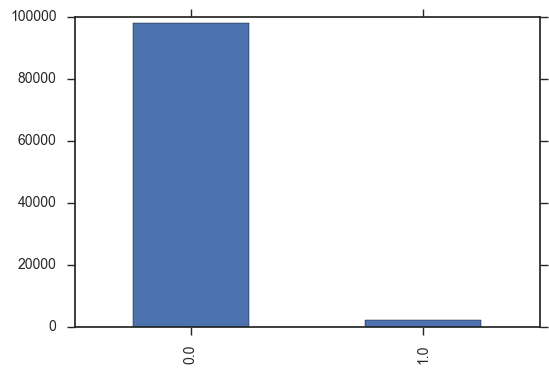

In [24]:
email_table['class'].value_counts().plot(kind='bar')

### From this plot we see how unbalanced our data is in terms of class values. This is important to take note of since we're trying to predict a value, we need either a.) more training examples with class =1 or we need b.) weight class =1 with some weighting factor.

In [25]:
dummies = pd.get_dummies(email_table[['email_text','weekday','user_country']])

In [26]:
features = email_table[['hour','user_past_purchases']]

In [27]:
fefeatures = email_table[['hour','user_past_purchases']]
features=pd.concat([dummies,features],axis =1)

In [29]:
target = email_table['class']

In [106]:
def run_model_pipeline_grid(df_read_in,features,target):
    
    from sklearn.cross_validation import train_test_split
    from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.pipeline import Pipeline
    from sklearn.model_selection import RandomizedSearchCV    
    #Train test split is performed to get a better understanding of how the model is performing. 
    #It's important to look at to decide hyperparameters how the model will be generalized and behave when given new data.

    X_train, X_test, y_train, y_test = train_test_split(features,target,test_size = 0.2)
    clf = Pipeline([('clf', RandomForestClassifier( class_weight={1:1/10} ,min_samples_split =5))])
    clf.fit(X_train, y_train)  
    parameters = {'clf__n_estimators': (5,10,15),
                'clf__max_depth':(2,3,4,5,6,10,20)}
    ## Using a gridisearch to help tune the model parameters
    rs_clf= RandomizedSearchCV(clf, parameters, n_jobs=1)
    rs_clf= rs_clf.fit(X_train,y_train)
    print(X_train.shape,y_train.shape)
    
    print(rs_clf.best_score_) 
    rs_clf.cv_results_
    
    return(rs_clf.best_estimator_, X_train, X_test, y_train, y_test, features, target)

In [107]:
model, X_train, X_test, y_train, y_test,features,target = run_model_pipeline_grid(email_table,features,target)
model

((80000, 15), (80000,))
0.9785125


Pipeline(steps=[('clf', RandomForestClassifier(bootstrap=True, class_weight={1: 0}, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])

In [108]:
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt
import seaborn
def analyze_model(model,X_test,y_test):
    
    ## Looking at the predictive power of the model: ROC-Curve and Precision-Recall
    
    predict = model.predict_proba(X_test)[:,1]
    prec, rec, thresh_ = precision_recall_curve(y_test,predict)
    fpr,tpr, thresh2 = roc_curve(y_test,predict)

    ## plot precision recall curve
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.plot(rec,prec)
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.title('Precision Recall Curve')

    plt.subplot(1,2,2)
    plt.plot(fpr,tpr)
    plt.plot([1,0], [1,0], 'k--', lw=2)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('Reciever Operator Charactoristics')
    plt.show()

    print('TPR and FPR versus Threshold Separetely')
    print('-------------------------------------------------------------------------------')
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    # F1 = 2 * (prec * rec) / (prec + rec)
    thresh = list(thresh_)
    # thresh.append(1)
    plt.plot(thresh2,tpr)
    plt.title('TPR Versus Threshold')
    plt.ylabel('tpr')
    plt.xlabel('Threshold')

    plt.subplot(1,2,2)
    # F1 = 2 * (prec * rec) / (prec + rec)
    thresh = list(thresh2)
    # thresh.append(1)
    plt.plot(thresh,fpr)
    plt.title('FPR Versus Threshold')
    plt.ylabel('fpr')
    plt.xlabel('Threshold')
    plt.show()
    return(predict)

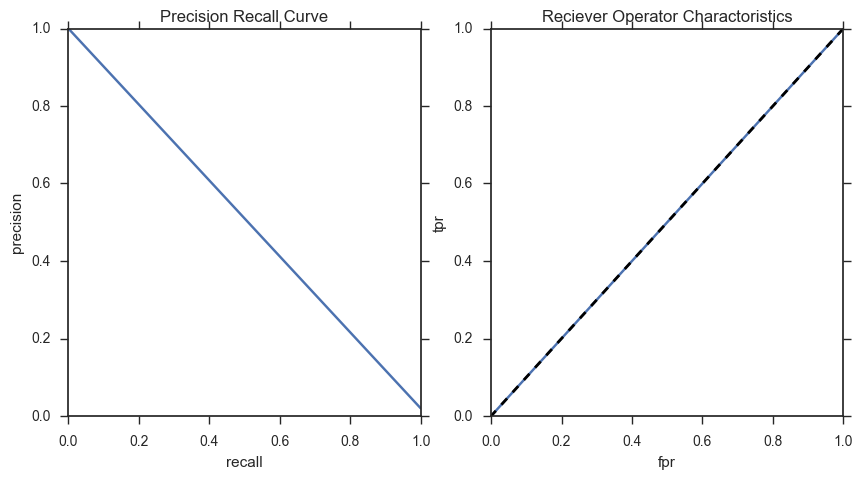

TPR and FPR versus Threshold Separetely
-------------------------------------------------------------------------------


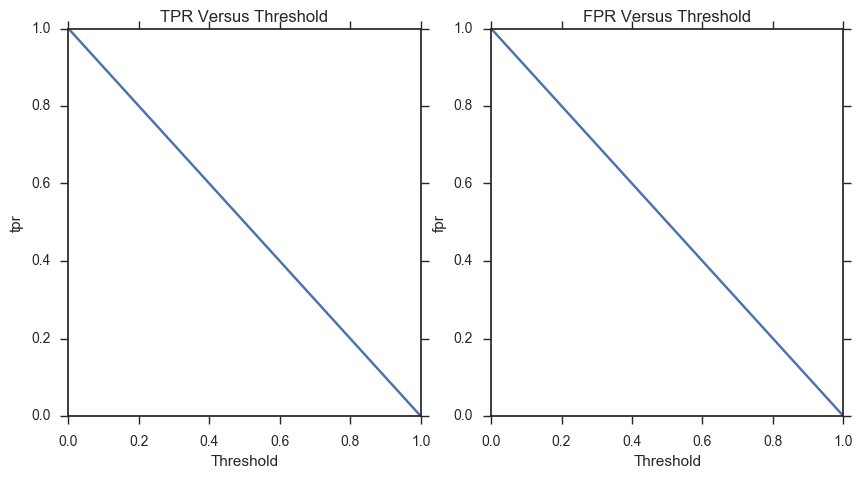

In [109]:
pred = analyze_model(model,X_test,y_test)

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '-', color="r",
             label="Train")
    plt.plot(train_sizes, test_scores_mean, '-', color="g",
             label="Test")

    plt.legend(loc="best")
    return plt

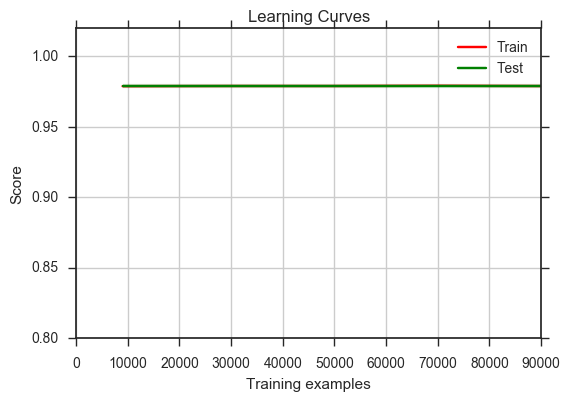

In [111]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle = True)
plot_learning_curve(model, "Learning Curves", features, target, (0.8, 1.02), cv=kf, n_jobs=-1)
plt.show()

In [ ]:
## Things are working a little too well, I need to do a bit more feature engineering.